# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

```
!pip install --upgrade pip
```
```
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info
```

## Importar librerías

In [1]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [3]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
raw_penguins_df = palmerpenguins.load_penguins_raw()
raw_penguins_df

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,64,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N98A2,Yes,2009-11-19,55.8,19.8,207.0,4000.0,MALE,9.70465,-24.53494,NaN
340,PAL0910,65,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A1,No,2009-11-21,43.5,18.1,202.0,3400.0,FEMALE,9.37608,-24.40753,Nest never observed with full clutch.
341,PAL0910,66,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N99A2,No,2009-11-21,49.6,18.2,193.0,3775.0,MALE,9.46180,-24.70615,Nest never observed with full clutch.
342,PAL0910,67,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N100A1,Yes,2009-11-21,50.8,19.0,210.0,4100.0,MALE,9.98044,-24.68741,NaN


#### Datos previamente procesados

In [5]:
preprocess_penguins_df = palmerpenguins.load_penguins()
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Utilizando los conjuntos de datos de `seaborn`

In [6]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Utilizando la interfaz de `Deepnote`

Links de importación de datos:

- [Conjunto de datos crudos](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins_raw.csv).
- [Conjunto de datos previamente procesados](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv).

In [7]:
preprocess_penguins_df = pd.read_csv('penguins.csv')
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [9]:
preprocess_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [10]:
(
    pre_penguin_df
    .dtypes
    .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [11]:
preprocess_penguins_df.shape

(344, 8)

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [12]:
(
    preprocess_penguins_df
    .isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [13]:
(
    preprocess_penguins_df
    .isna()
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [14]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [15]:
(
    preprocess_penguins_df
    .isnull()
    .sum()
    .sum()
)

19

## ¿Cuál es la proporción de valores nulos por cada variable?

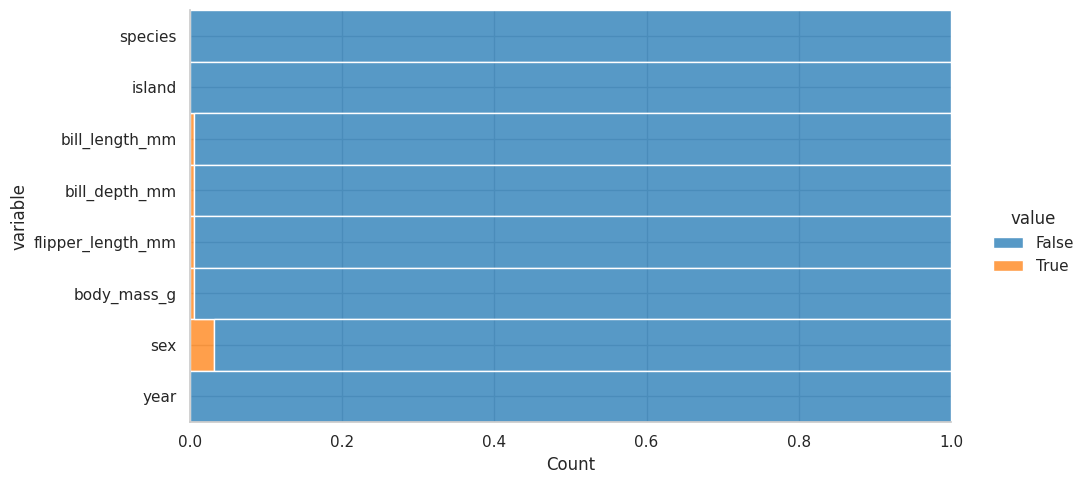

In [16]:
(
    preprocess_penguins_df
    .isnull()
    .melt()
    .pipe(
        lambda df : (
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect = 2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

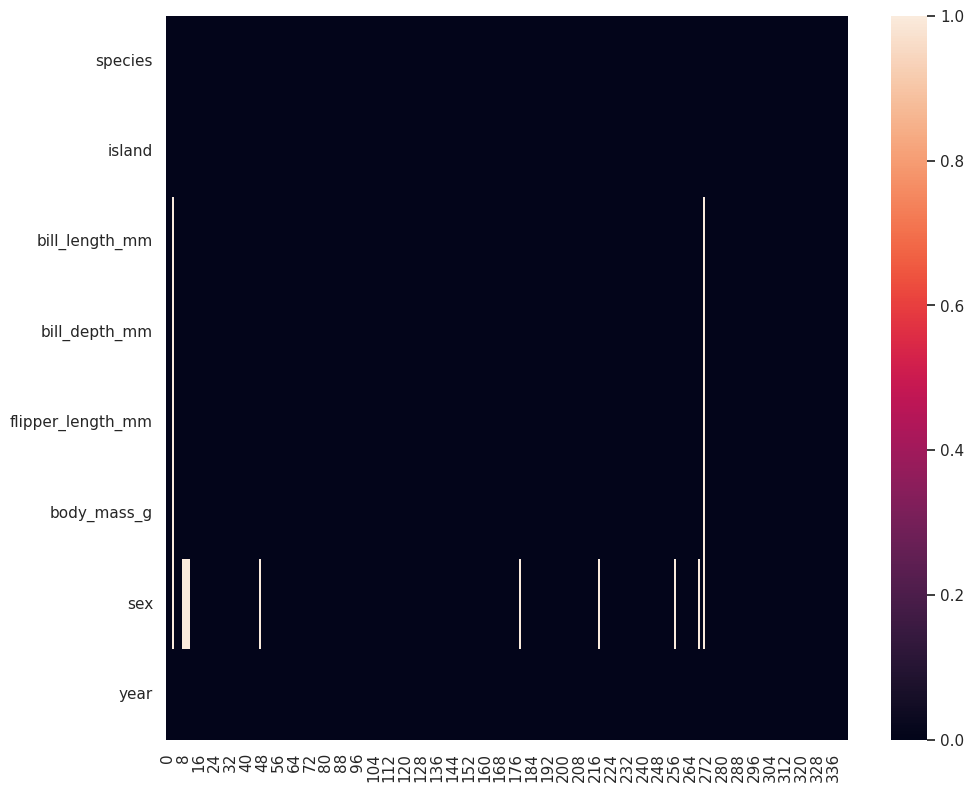

In [17]:
(
    preprocess_penguins_df
    .isnull()
    .transpose()
    .pipe(
        lambda df : (
            sns.heatmap(
                data = df
            )
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [18]:
processed_penguins_df = (
    preprocess_penguins_df
    .dropna()
)

processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [19]:
processed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [20]:
processed_penguins_df.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [21]:
processed_penguins_df.describe(include = [np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [22]:
processed_penguins_df.describe(include = object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### Solo categóricas - 2

In [23]:
(
    processed_penguins_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

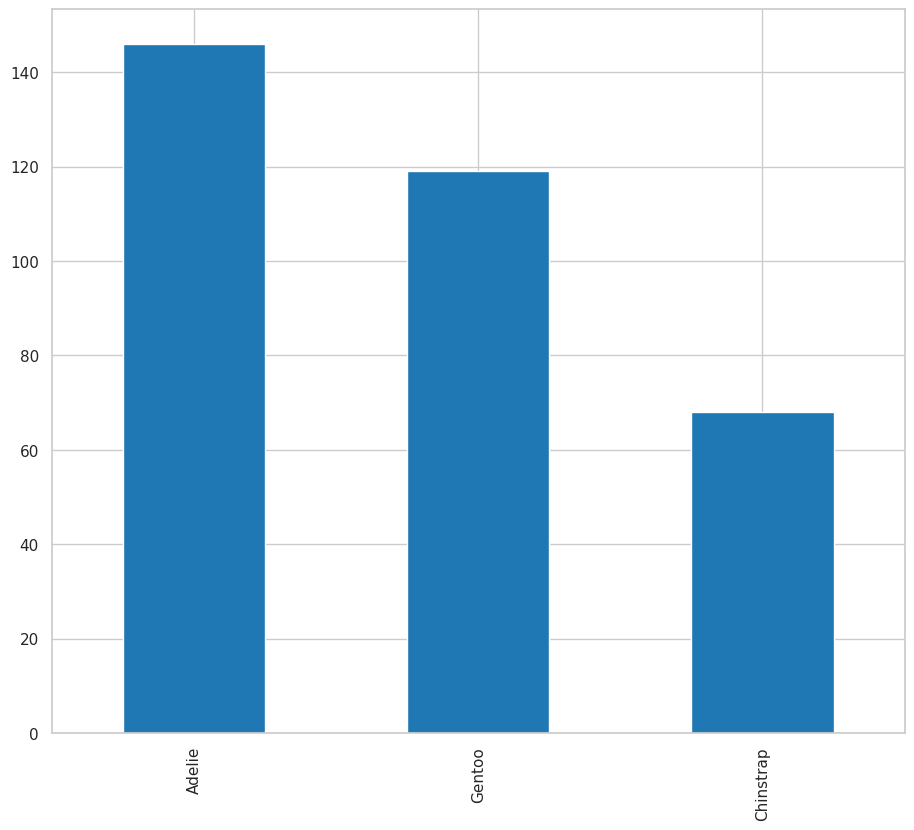

In [24]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(kind = 'bar')
)

### Seaborn

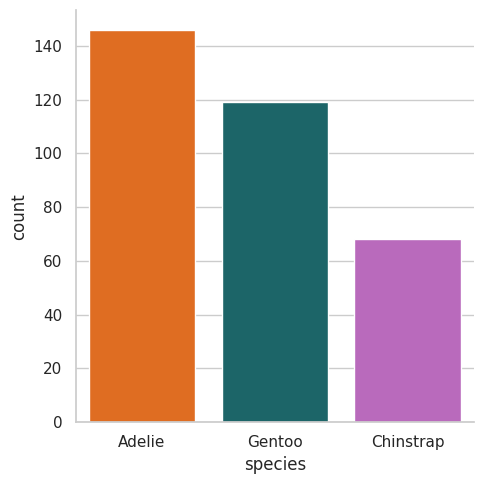

In [25]:
sns.catplot(
    processed_penguins_df,
    x = 'species',
    kind = 'count',
    palette= penguin_color
)

<AxesSubplot: xlabel='species', ylabel='count'>

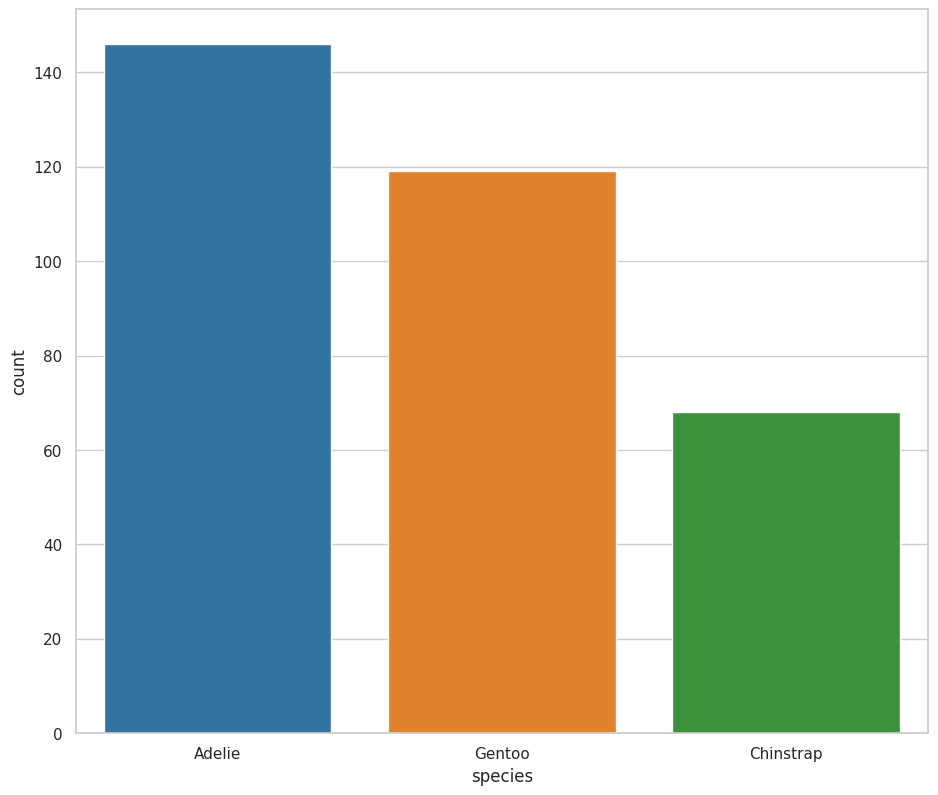

In [26]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data = df,
                x = 'species',
                y = 'count'
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

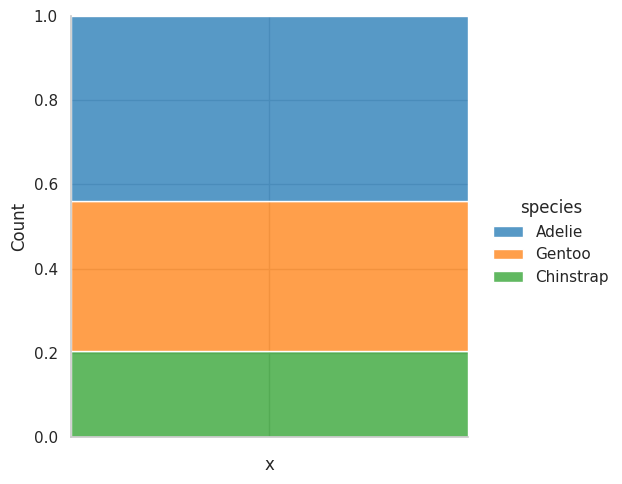

In [27]:
(
    processed_penguins_df
    .add_column('x', '')
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                x = 'x',
                hue ='species',
                multiple='fill'
            )
        )
    )
)

# Medidas de tendencia central

## Media o promedio

In [28]:
processed_penguins_df.bill_depth_mm.mean()

17.164864864864867

In [29]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864867

In [30]:
processed_penguins_df.mean()

/tmp/ipykernel_95/1618060137.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

## Mediana

In [31]:
preprocess_penguins_df.median()

/tmp/ipykernel_95/1508209255.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  preprocess_penguins_df.median()


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

## Moda

In [32]:
processed_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


In [33]:
preprocess_penguins_df.describe(include=object)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [34]:
processed_penguins_df.max(numeric_only=True)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64

## ¿Cuál es el valor mínimo de las variables?

In [35]:
processed_penguins_df.min(numeric_only=True)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64

## ¿Cuál es el rango de las variables?

In [36]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [37]:
processed_penguins_df.std()

/tmp/ipykernel_95/4261057176.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.std()


bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [38]:
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
year                 2007.229098
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [39]:
processed_penguins_df.quantile(0.75)

/tmp/ipykernel_95/3609120765.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75)


bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [40]:
processed_penguins_df.quantile(0.25)

/tmp/ipykernel_95/2653252021.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.25)


bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
year                 2007.0
Name: 0.25, dtype: float64

In [41]:
processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)

/tmp/ipykernel_95/1337602098.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.quantile(0.75) - processed_penguins_df.quantile(0.25)


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [42]:
(
    processed_penguins_df
    .quantile(q=[0.75, 0.5, 0.25])
    .T
    .rename_axis('variable')
    .reset_index()
    .assign(
       iqr = lambda df: df[0.75] - df[0.25]
    ) 
)

/tmp/ipykernel_95/2446967708.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df


,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

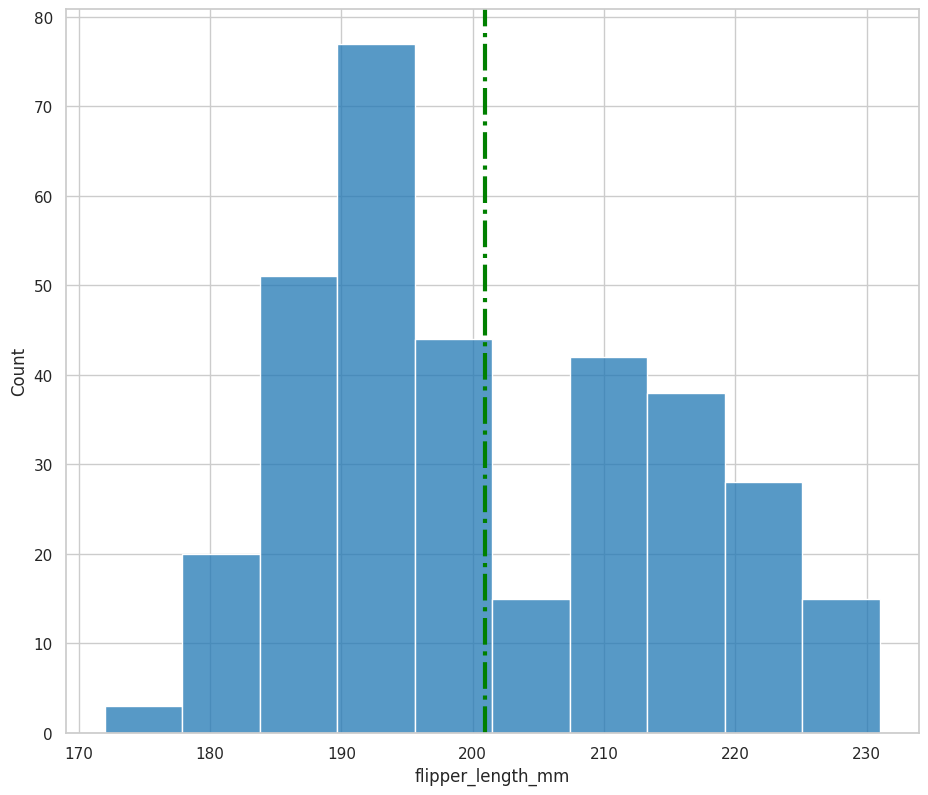

In [43]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm'
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='green',
    linestyle = 'dashdot',
    linewidth = 3
)

### Diagrama de caja / boxplot

<AxesSubplot: xlabel='flipper_length_mm'>

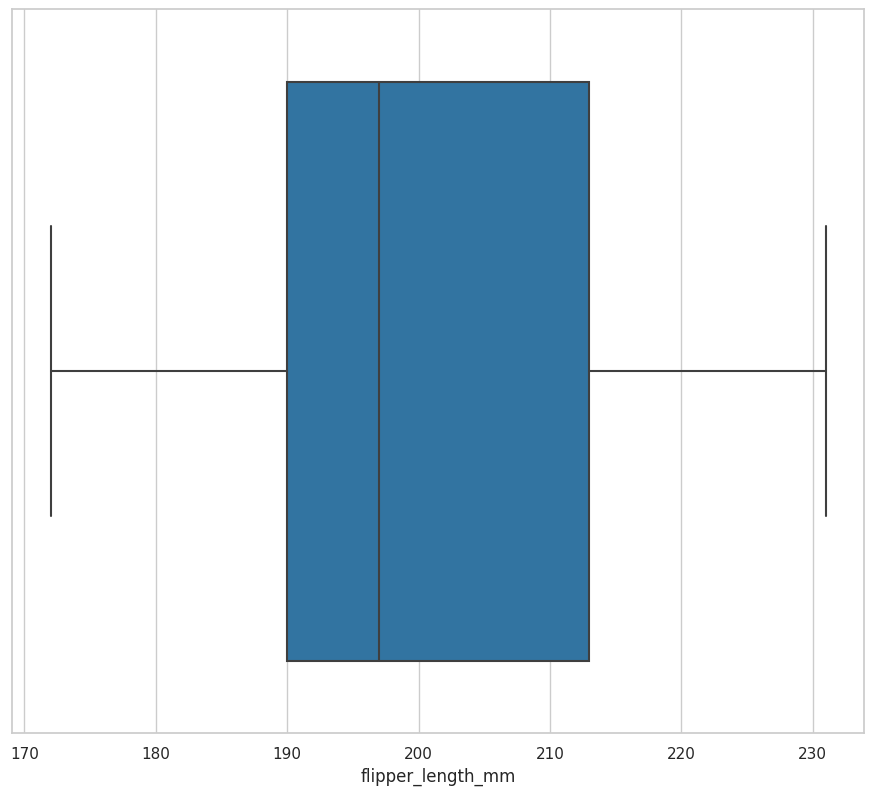

In [44]:
sns.boxplot(
    data= processed_penguins_df,
    x = 'flipper_length_mm'
)

### Limitaciones

In [45]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

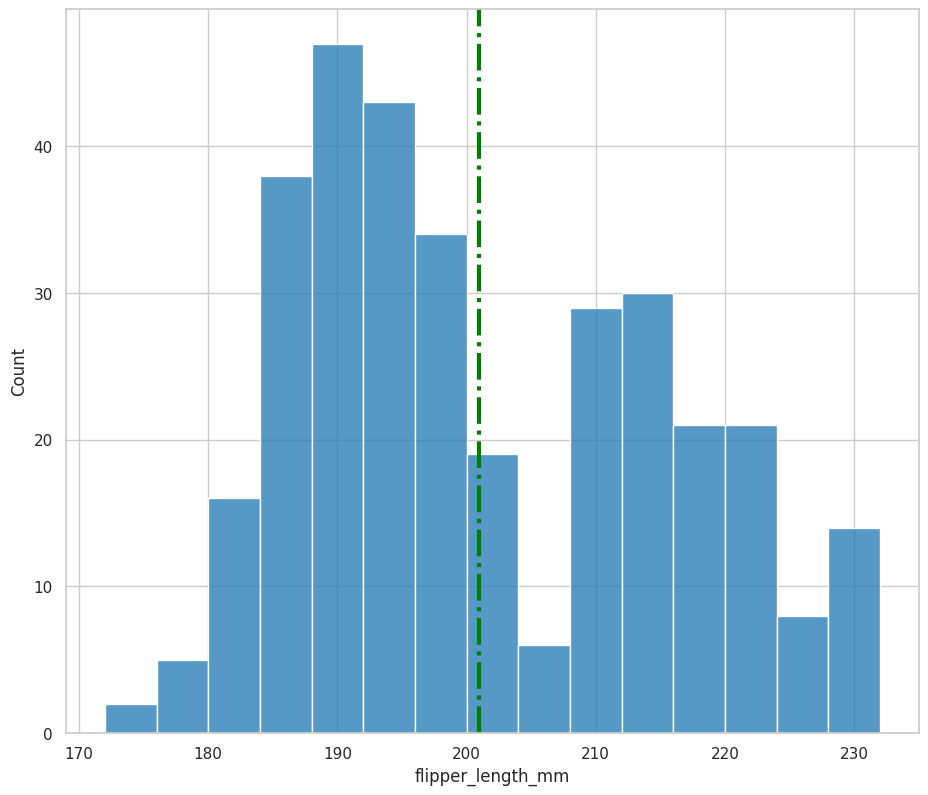

In [46]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='green',
    linestyle = 'dashdot',
    linewidth = 3
)

# Distribuciones: PMFs, CDFs y PDFs

# Estadística descriptiva aplicada: distribuciones

## ¿Cómo visualizar una distribución?

- Histograma
- Función de probabilidad de masas (PMF)
- Función de distribución acumulada (CDF)
- Función de probabilidad de densidad (PDF)

### _Función de probabilidad de masas (PMF)_
Nos dice la probabilidad de que una variable aleatoria discreta tome un valor determinado.  Por ejemplo, la probabilidad de que en un salón haya personas que tengan 16 años.

La función de masa de probabilidad depende de los valores de cualquier número real. No va al valor de X que es igual a cero y en el caso de x, el valor de PMF es positivo.

El PMF juega un papel importante en la definición de una distribución de probabilidad discreta y produce resultados distintos. La fórmula de PMF es p (x) = P (X = x) es decir, la probabilidad de (x) = la probabilidad (X = una x específica)

### _Función de distribución acumulada (CDF)_
Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado. Por ejemplo, cual es la probabilidad de que en un salón haya personas que tengan 16 o menos años.

En la teoría de la probabilidad y en estadística, la función de distribución acumulada  o función de probabilidad acumulada asociada a una variable aleatoria real $$X$$ sujeta a cierta ley de distribución de probabilidad, es una función matemática de la variable real $$x$$ que describe la probabilidad de que $$X$$ tenga un valor menor o igual que $$x$$.

Intuitivamente, asumiendo la función $$f$$ como la ley de distribución de probabilidad, la CFD sería la función con la recta real como dominio, con imagen del área hasta aquí de la función $$f$$, siendo aquí el valor $$x$$ para la variable aleatoria real $$X$$.
La CDF asocia a cada valor $$x$$, la probabilidad del evento: **_«la variable $$X$$ toma valores menores o iguales a $$x$$»_**.

### _Función de probabilidad de densidad (PDF)_
Determina la probabilidad de que una variable continua tome un valor determinado. Por ejemplo, la estatura de un grupo de personas.

En la teoría de la probabilidad, la función de densidad de probabilidad, función de densidad, o simplemente densidad de una variable aleatoria continua describe la probabilidad relativa según la cual dicha variable aleatoria tomará determinado valor.

La probabilidad de que la variable aleatoria caiga en una región específica del espacio de posibilidades estará dada por la integral de la densidad de esta variable entre uno y otro límite de dicha región.
La función de densidad de probabilidad  es positiva a lo largo de todo su dominio y su integral sobre todo el espacio es de valor unitario.

Una función de densidad de probabilidad caracteriza el comportamiento probable,  de una población, en tanto especifica la posibilidad relativa de que una variable aleatoria continua $$X$$ tome un valor cercano a $$x$$.

Una variable aleatoria $$X$$ tiene función de densidad $$f_{X}$$, siendo $$f_{X}$$ una función no-negativa integrable de Lebesgue, si:
$${\displaystyle \operatorname {P} [a\leq X\leq b]=\int _{a}^{b}f_{X}(x)\,dx}$$

si $$F_{X}$$ es la función de distribución de $$X$$, entonces

$${\displaystyle F_{X}(x)=\int _{-\infty }^{x}f_{X}(u)\,du}$$

### Parámetro de comparación PDF PMF

|Forma completa|Función de densidad de probabilidad|Función de probabilidad|
|--------------|-----------------------------------|-----------------------|
|Utilizar|El PDF se utiliza cuando es necesario encontrar una solución en un rango de variables aleatorias continuas.|PMF se utiliza cuando existe la necesidad de encontrar una solución en un rango de variables aleatorias discretas.|
|Variables aleatorias|PDF utiliza variables aleatorias continuas.|PMF utiliza variables aleatorias discretas.|
|Fórmula|$$F (x) = P (a X )$$|$$p (x) = P (X = x)$$|
|Solución|La solución cae en el rango de radio de variables aleatorias continuas.|Las soluciones se encuentran en el radio entre números de variables aleatorias discretas.|






## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

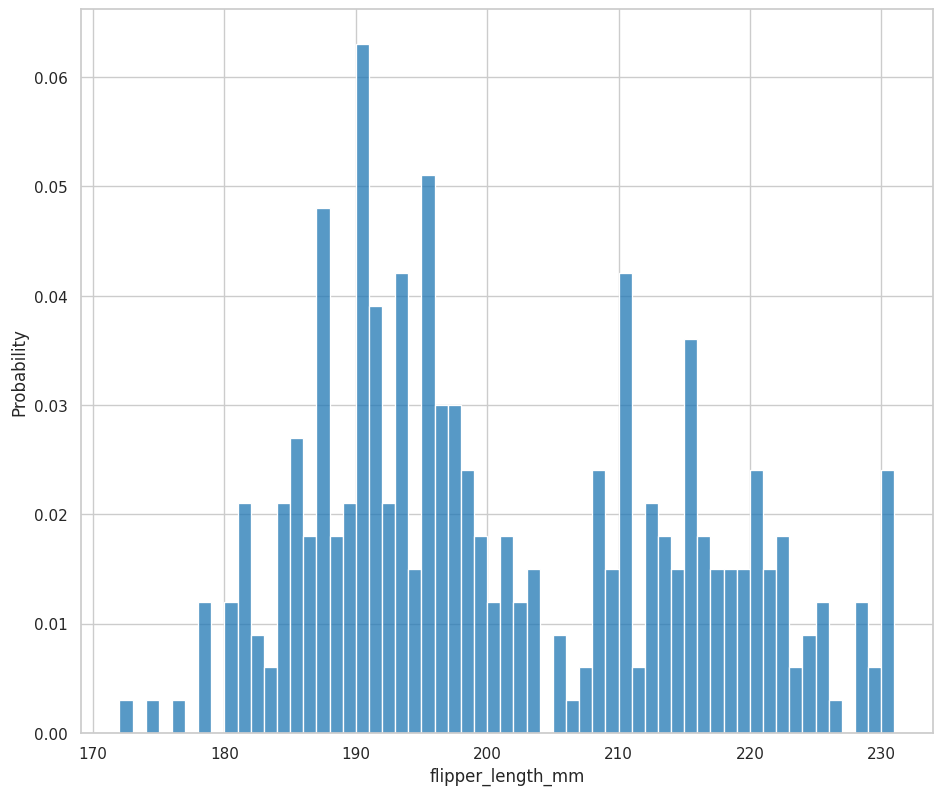

In [47]:
sns.histplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm',
    binwidth = 1,
    stat = 'probability'
)

### Utilizando `empiricaldist`

In [48]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize = True
)

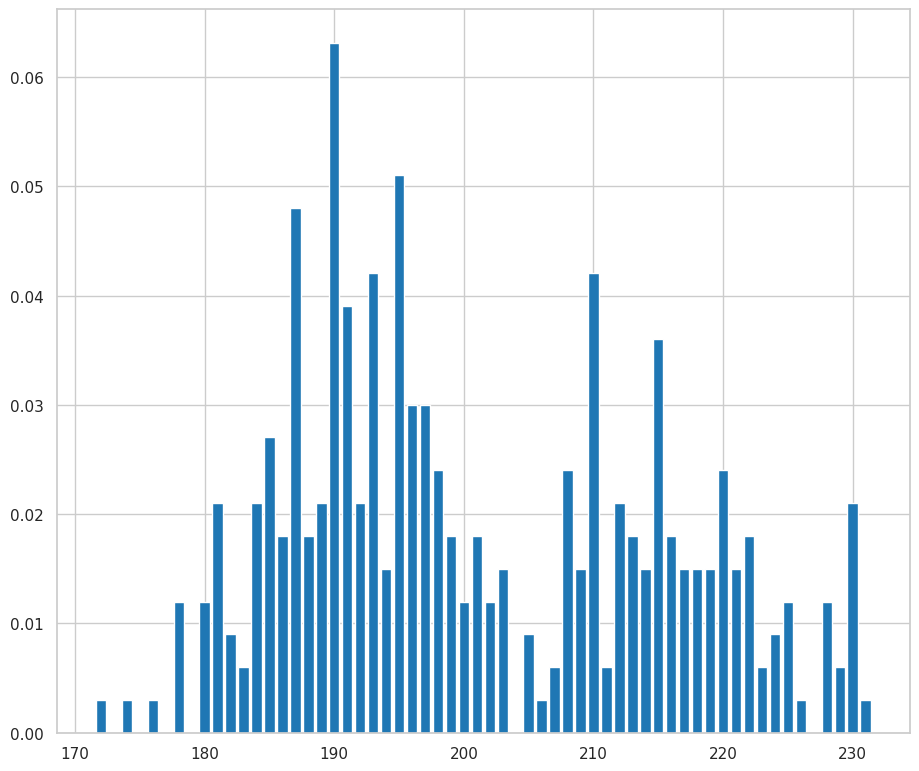

In [49]:
pmf_flipper_length_mm.bar()

In [50]:
#probabilidad  de encontrar un pinguino con esa longitud de alas
pmf_flipper_length_mm(190)

0.06306306306306306

In [51]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

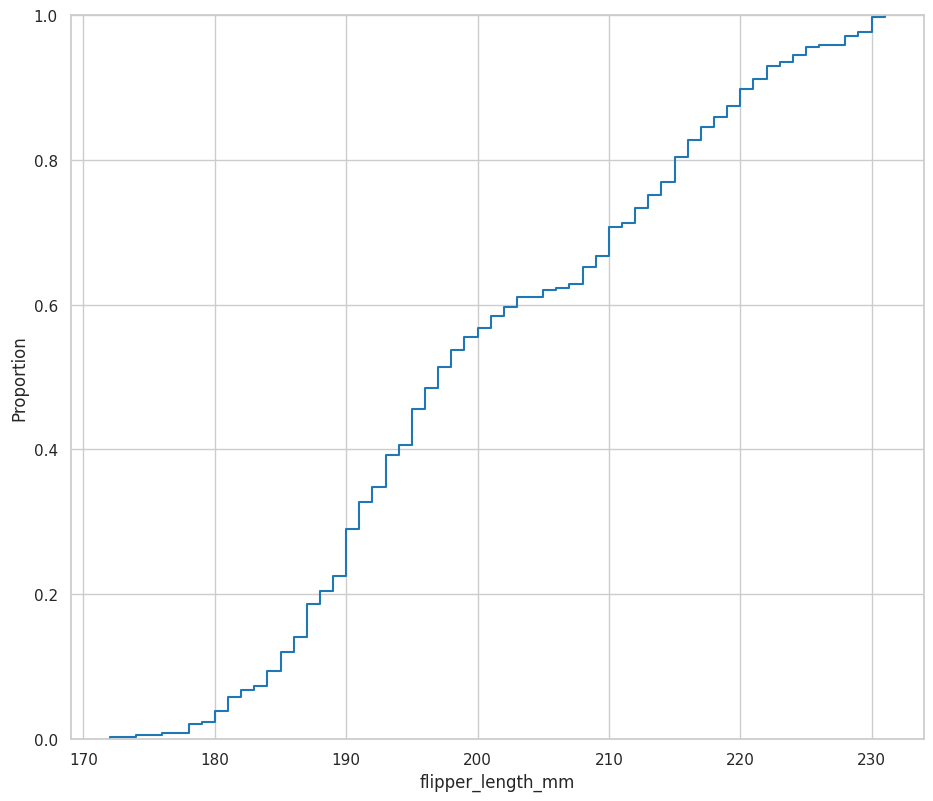

In [52]:
#Acumulada
sns.ecdfplot(
    data=preprocess_penguins_df,
    x = 'flipper_length_mm'
)

### Utilizando `empiricaldist`

In [53]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True   
)

la probabilidad de encontrar un pinguino con una longitud de alas de  200   mm es 0.5675675675675675 


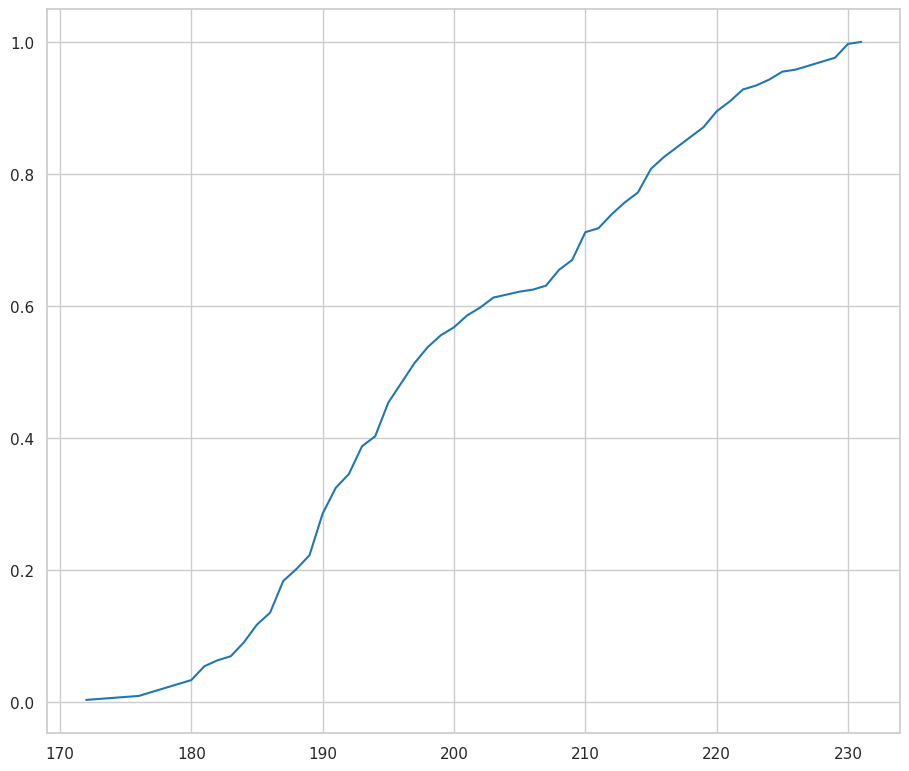

In [54]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm(q)
print('la probabilidad de encontrar un pinguino con una longitud de alas de  {}   mm es {} '.format(q,p) )

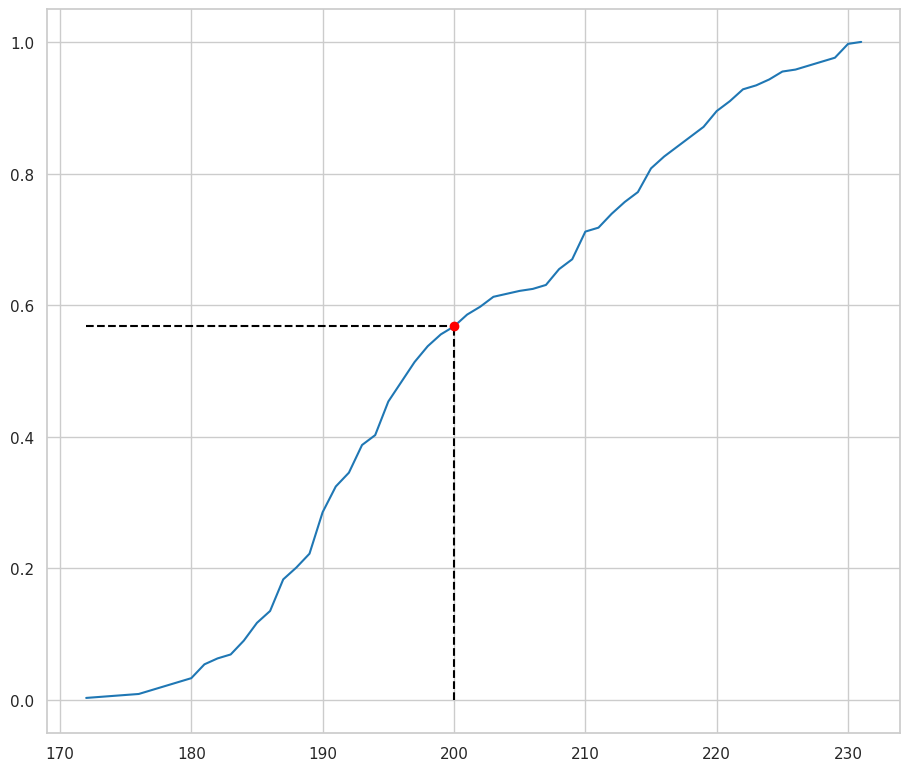

In [55]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

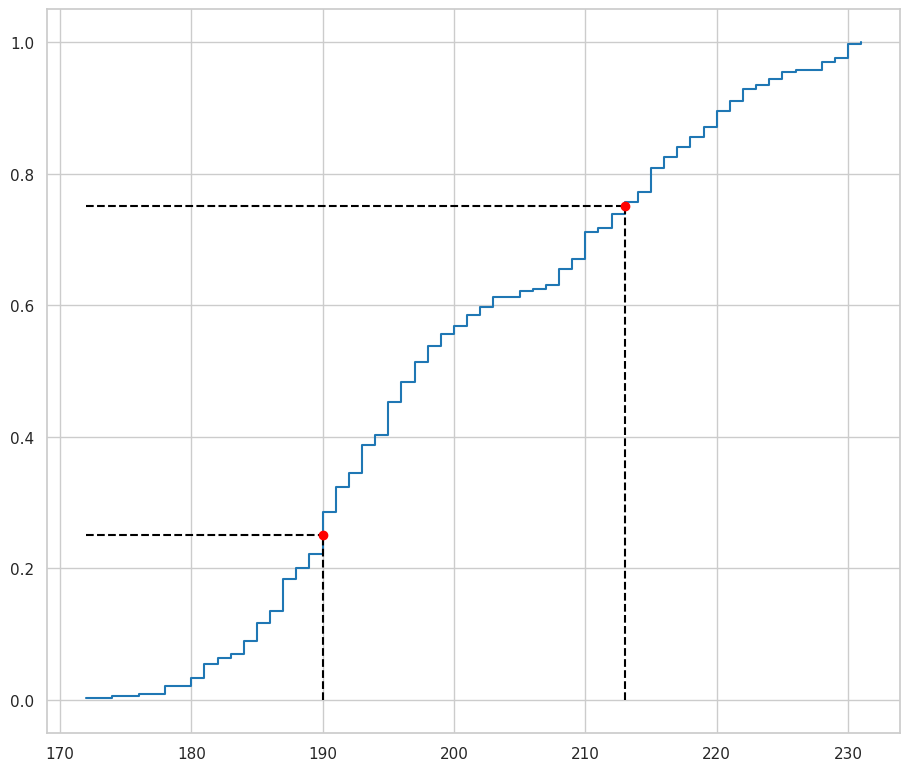

In [56]:
cdf_flipper_length_mm.step ( )
p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

### Comparando distribuciones

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

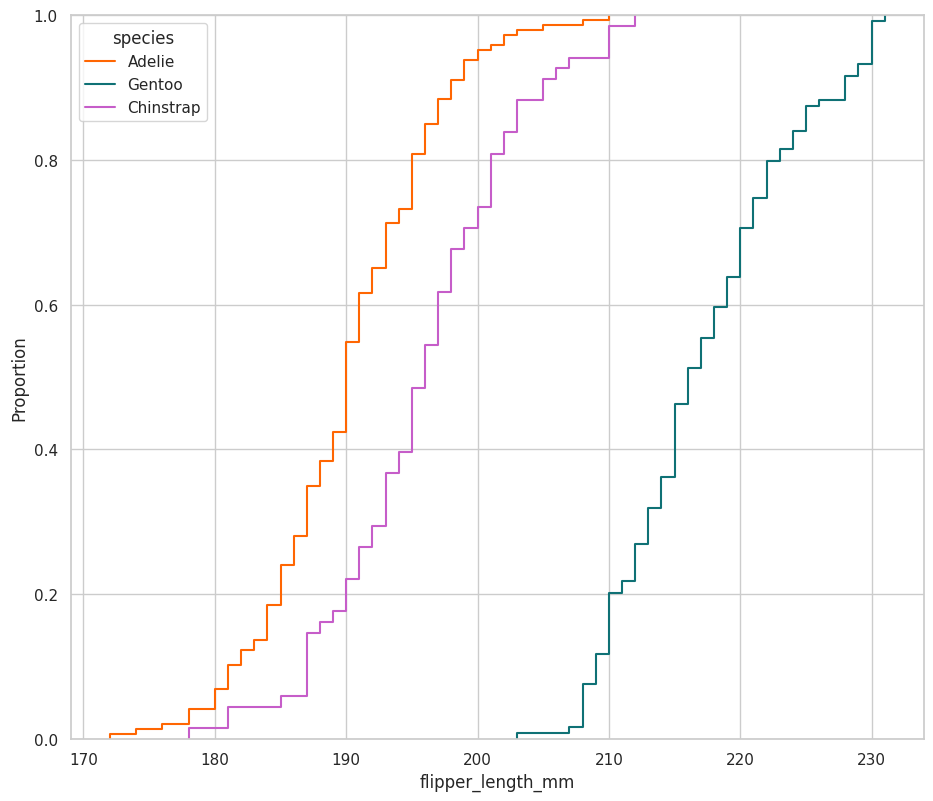

In [57]:
sns.ecdfplot(
    data=processed_penguins_df,
    x = 'flipper_length_mm',
    hue = 'species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

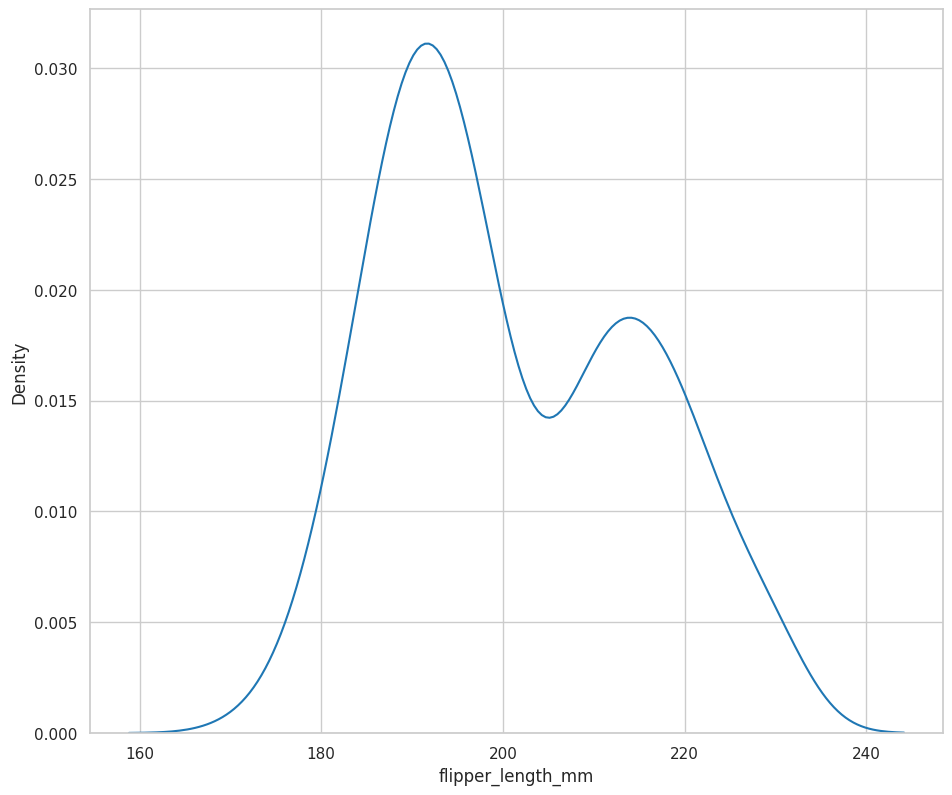

In [58]:
sns.kdeplot(
    data = processed_penguins_df,
    x = 'flipper_length_mm'
)

In [59]:
stats = processed_penguins_df.body_mass_g.describe()

<AxesSubplot: >

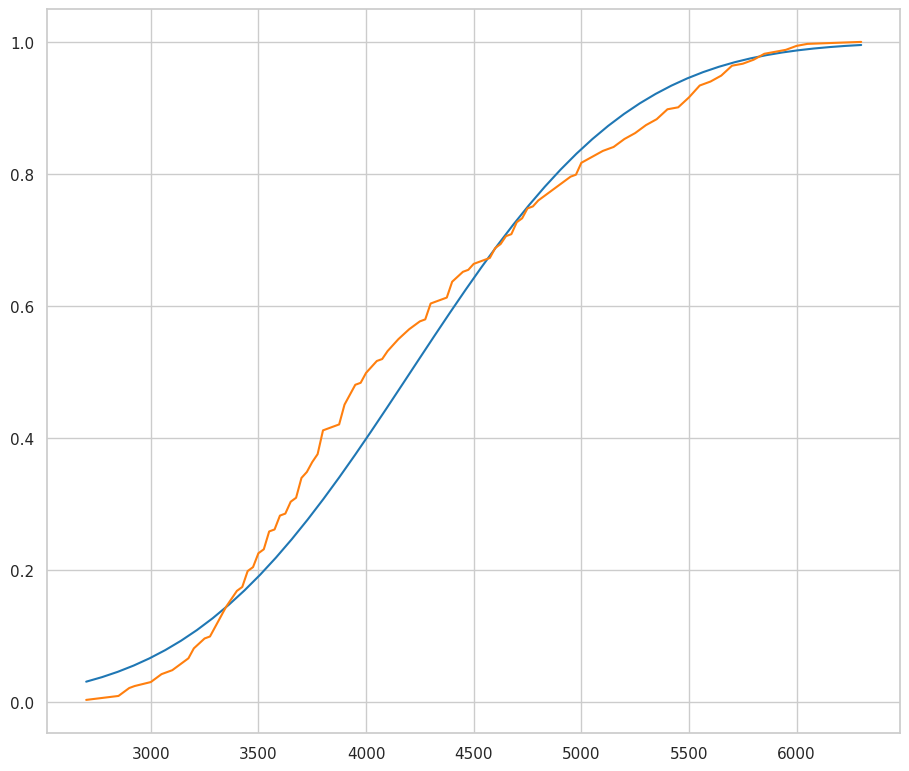

In [60]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs,ys)

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

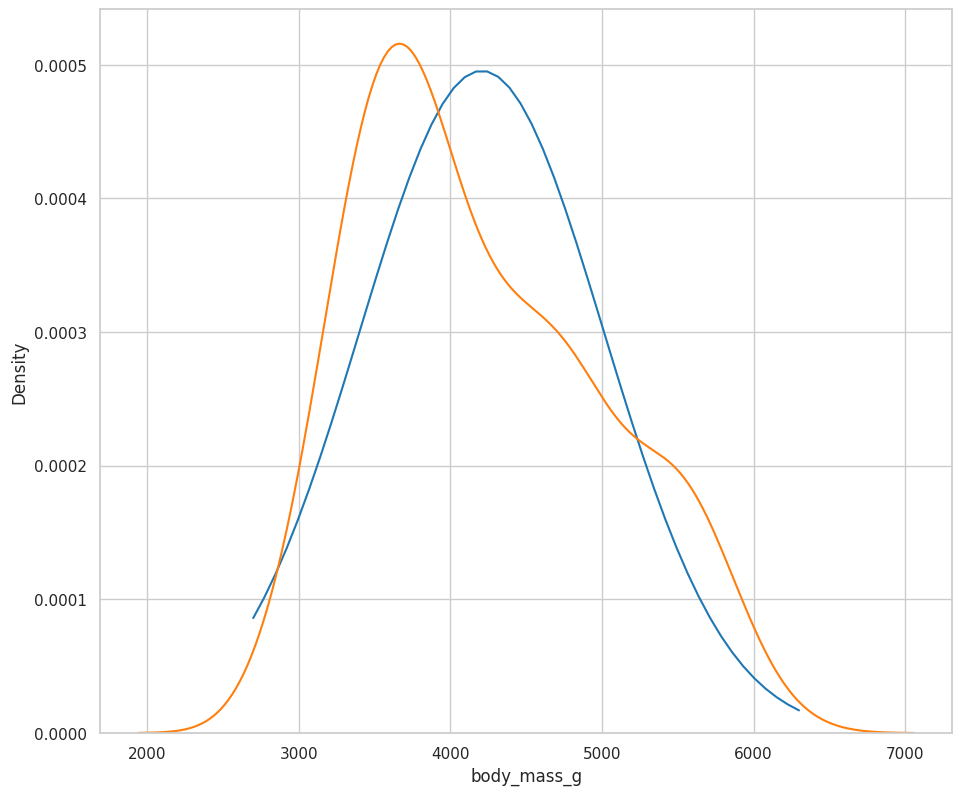

In [61]:
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs,ys)

sns.kdeplot(
    data=processed_penguins_df,
    x = 'body_mass_g'
)


# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

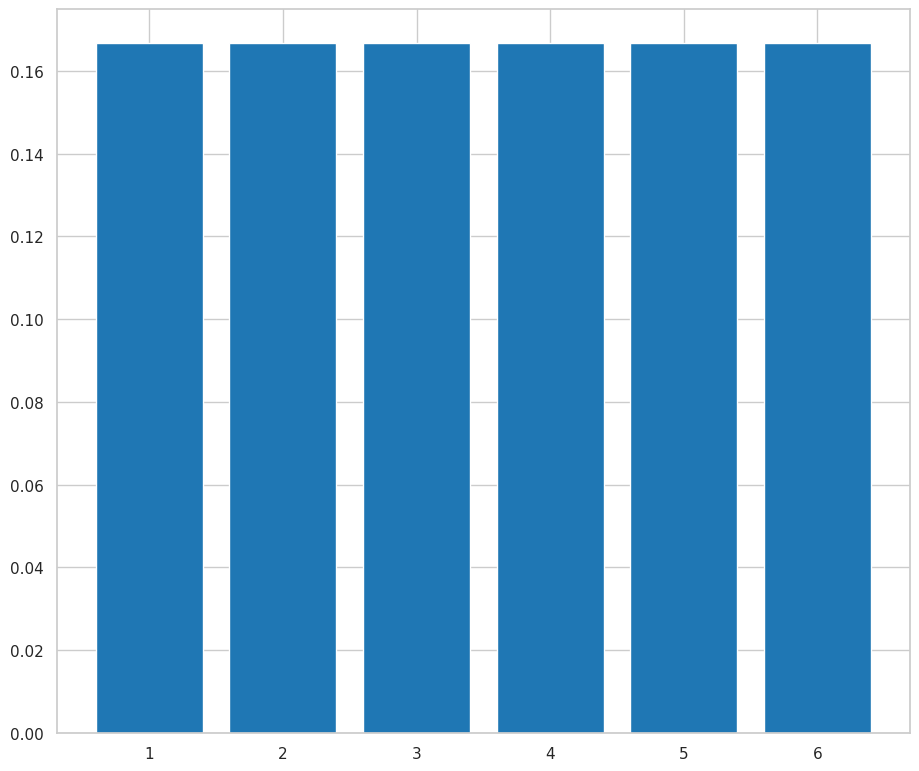

In [62]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

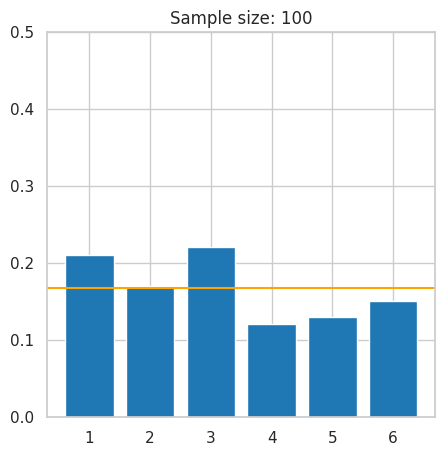

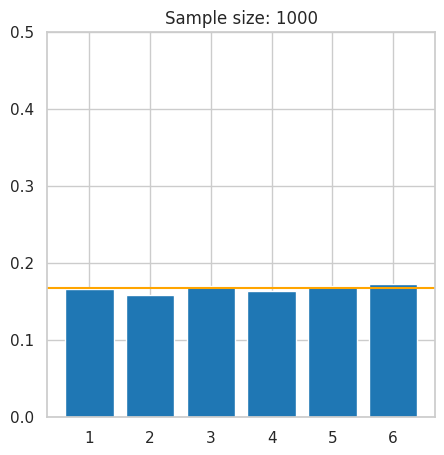

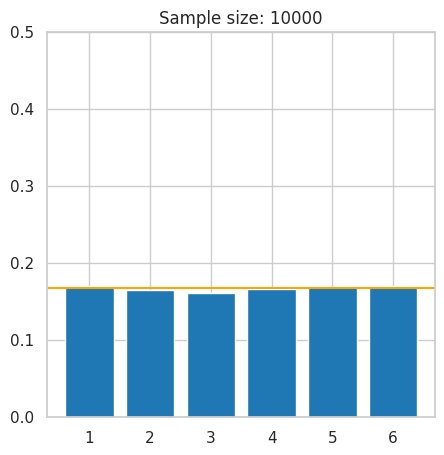

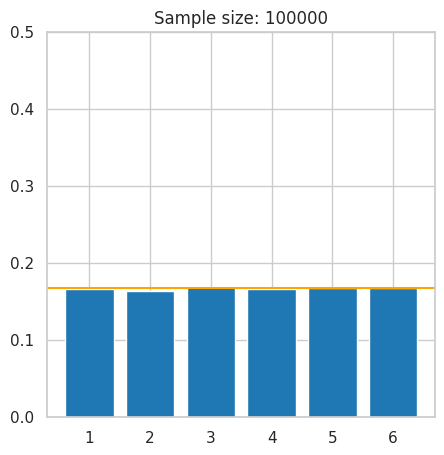

In [63]:
for sample_size in (1e2, 1e3, 1e4, 1e5):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color='orange')
    plt.ylim([0,0.5])
    plt.title(f"Sample size: {sample_size}")

## Teorema del Límite Central

La media de las muestras tiende aproximadamente a una distribución normal.

La suma de $n$ variables aleatorias independientes con medias y varianzas finitas, converge en distribución a una variable aleatoria con distribución normal.


In [64]:
processed_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [65]:
sex_numeric = processed_penguins_df.sex.replace(['male', 'female'], [1,0])

In [66]:
number_samples = 100
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

Estimated percentage of male penguins in population is: 49.9143%


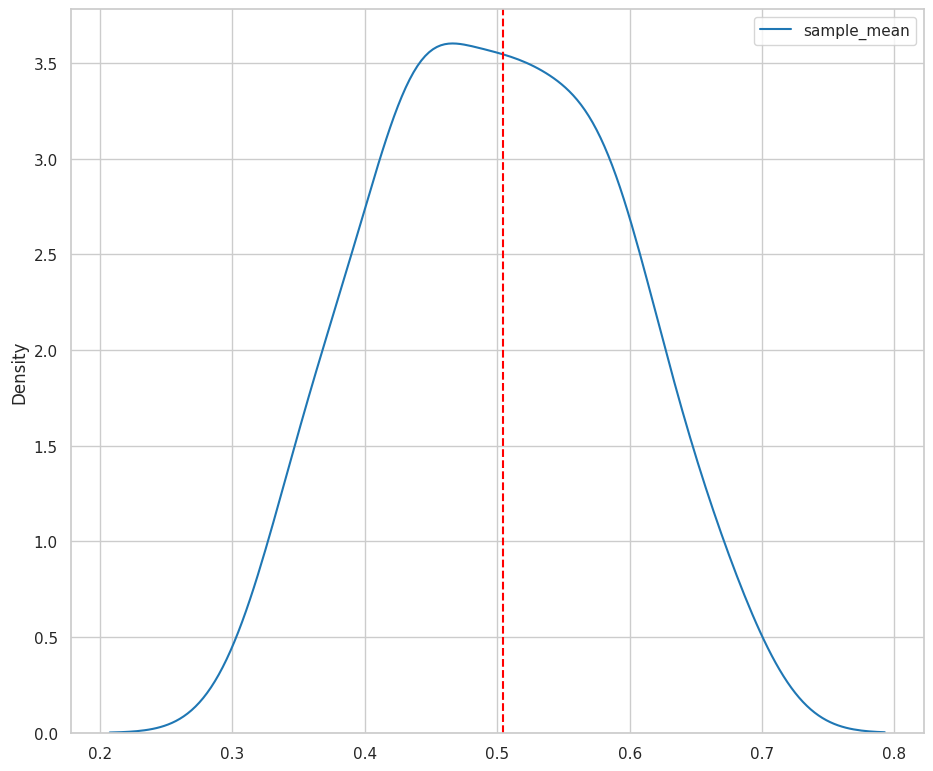

In [67]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [68]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

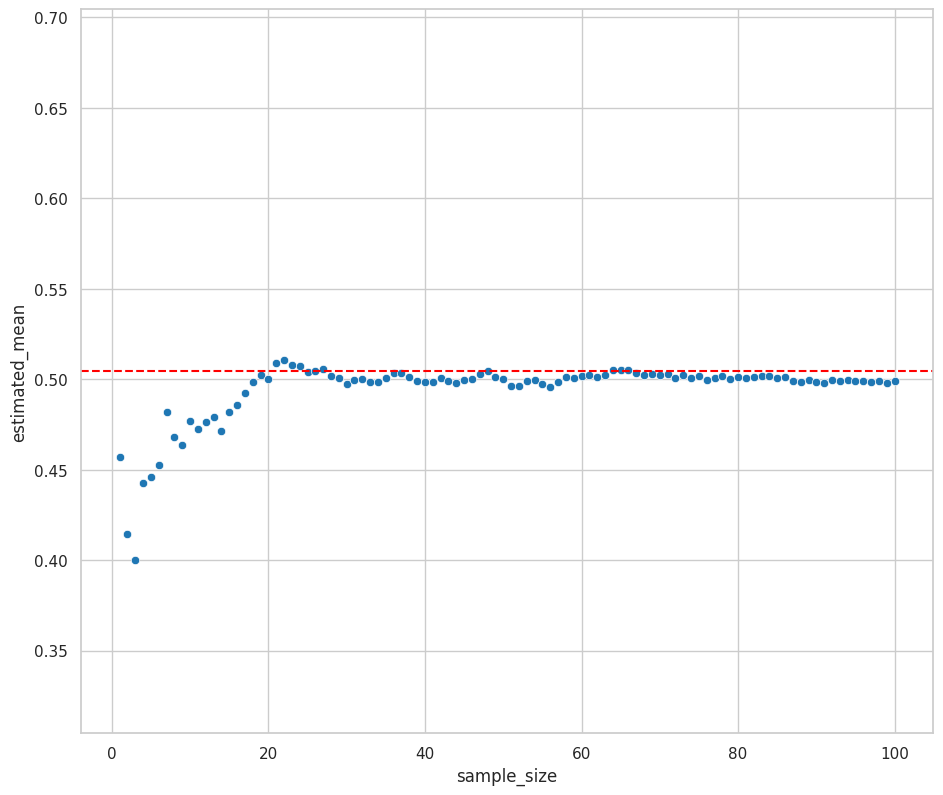

In [69]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

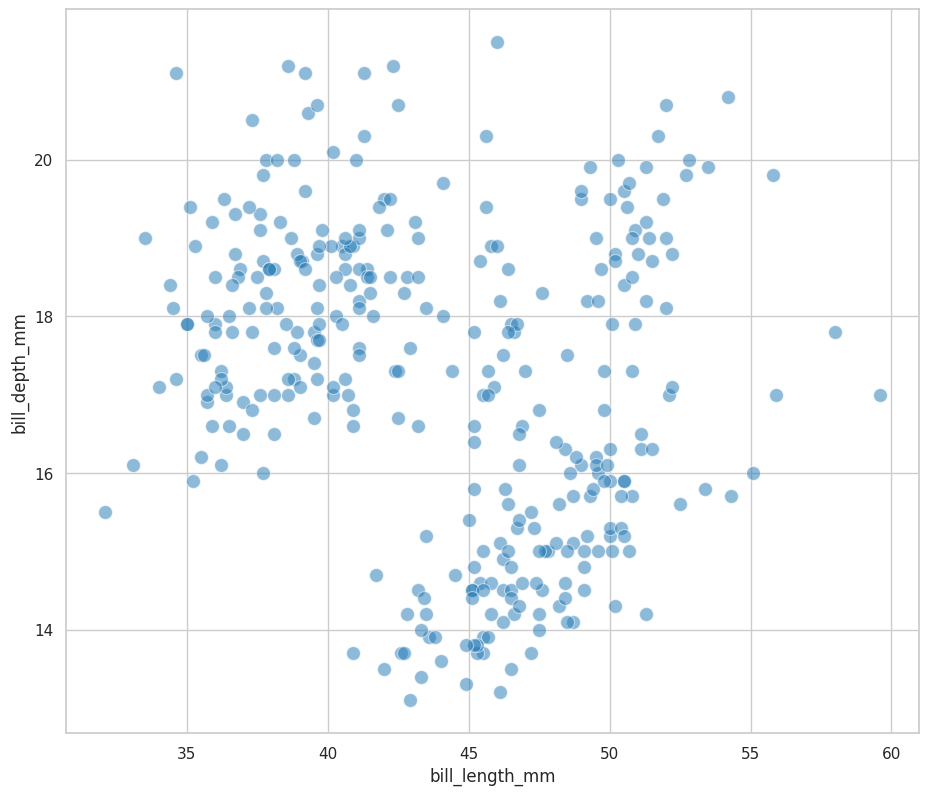

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    alpha= 1/2, #transparencia
    s = 100 #size
)

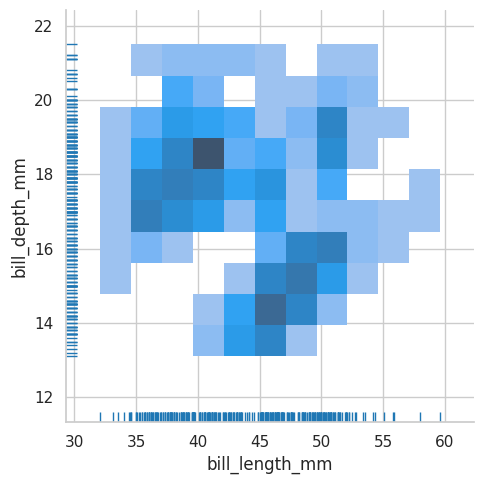

In [79]:
sns.displot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug = True
)

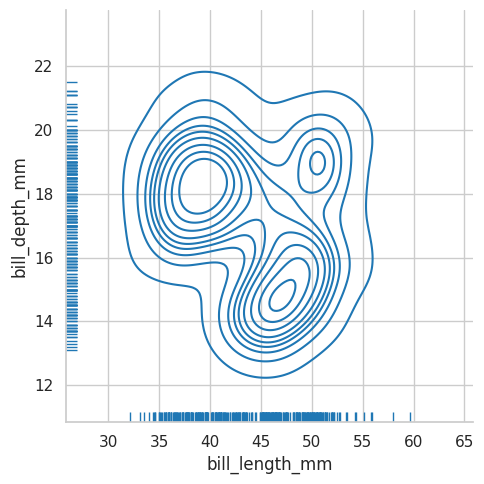

In [80]:
sns.displot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm',
    rug = True,
    kind = 'kde'
)

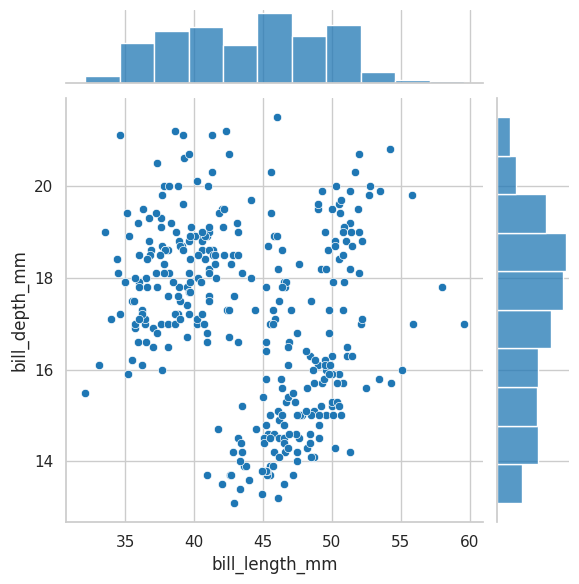

In [82]:
sns.jointplot(
    data = processed_penguins_df,
    x = 'bill_length_mm',
    y = 'bill_depth_mm'
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='bill_length_mm'>

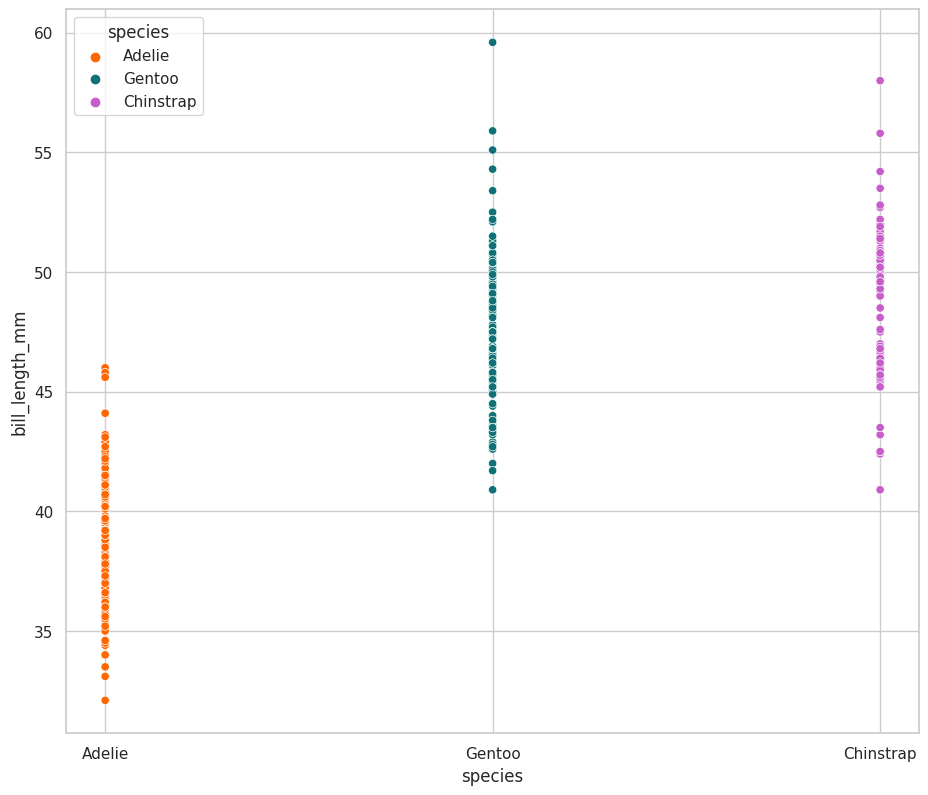

In [85]:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='bill_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

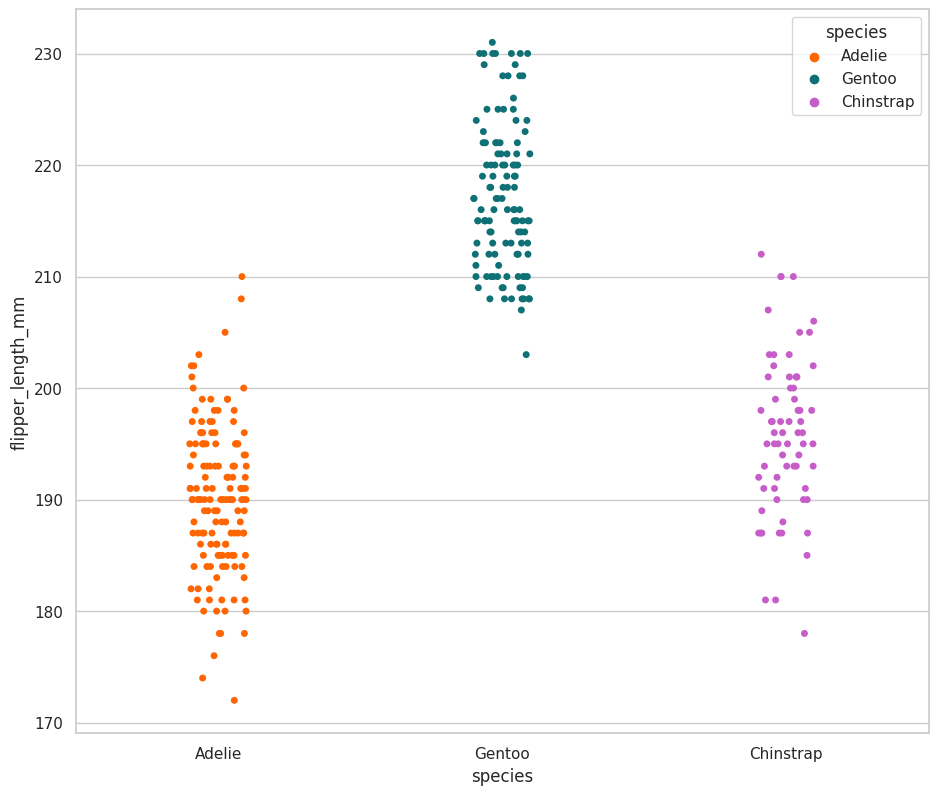

In [89]:
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

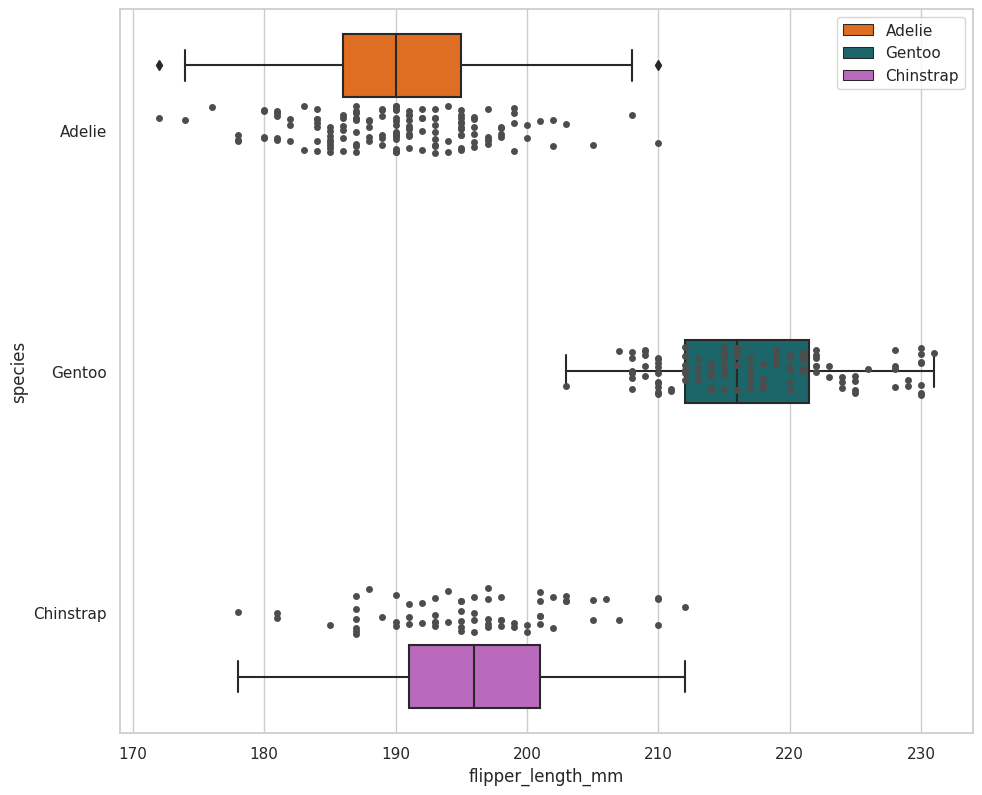

In [92]:
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    hue='species',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color = '.3'
)

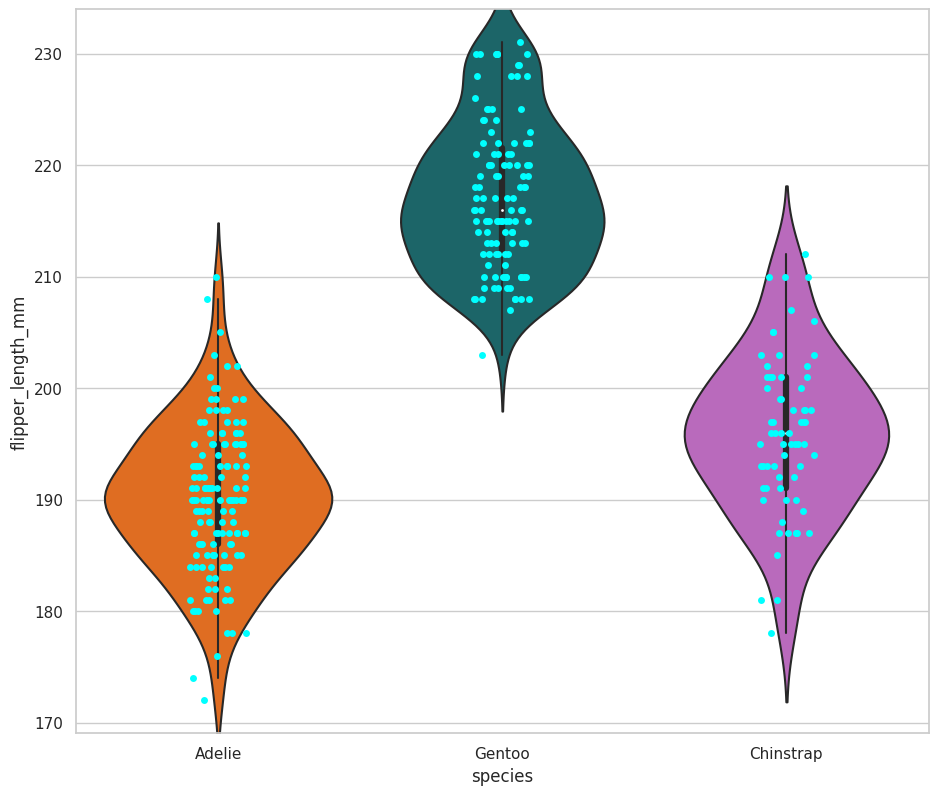

In [97]:
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color = 'cyan'
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

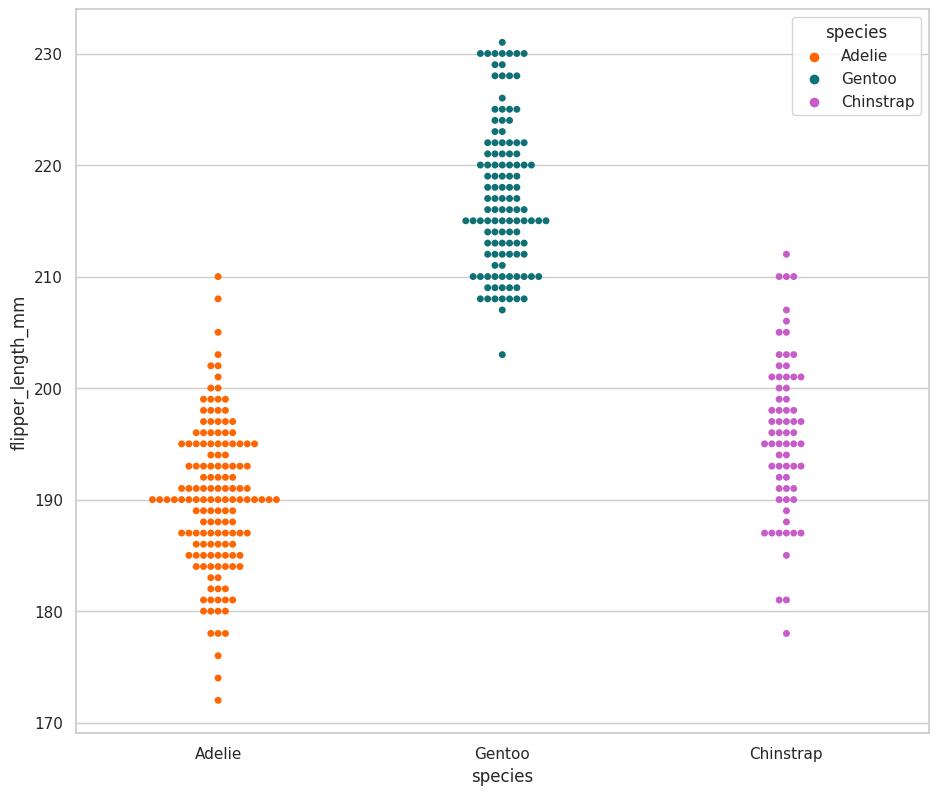

In [99]:
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

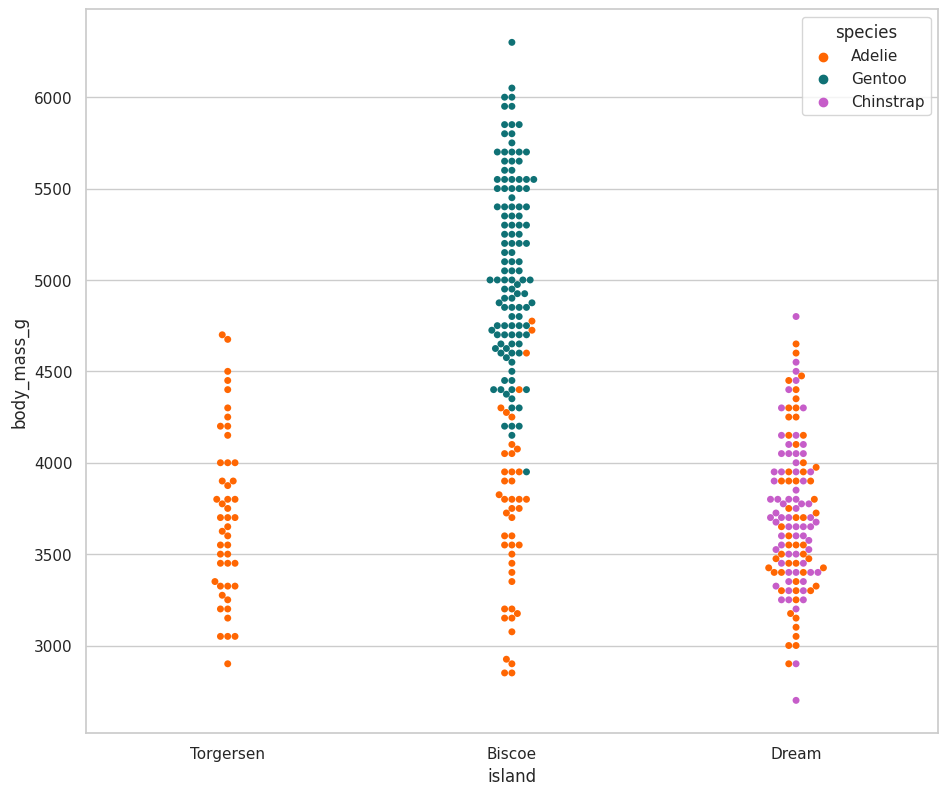

In [83]:
sns.swarmplot(
    data=processed_penguins_df,
    x='island',
    y='body_mass_g',
    hue='species',
    palette=penguin_color
)

<AxesSubplot: xlabel='bill_depth_mm', ylabel='bill_length_mm'>

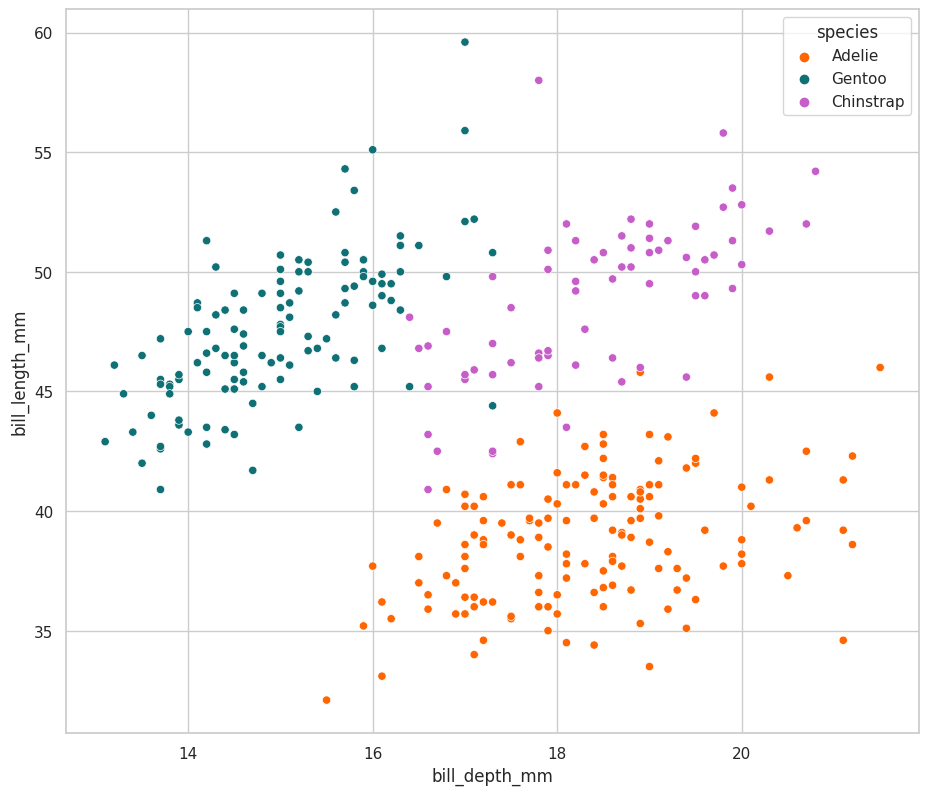

In [88]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_depth_mm',
    y='bill_length_mm',
    hue='species',
    palette=penguin_color
)

In [105]:
processed_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

## ¿Cómo puedo visualizar los coeficientes de correlación?

## ¿Cómo podría representar una variable categórica como númerica discreta?

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

### El coeficiente de correlación no nos habla del impacto de la relación

# Estableciendo relaciones: Análisis de regresión simple

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

#### Modelo 2

#### Modelo 3

#### Modelo 4

#### Modelo 5

### Visualizando resultados

#### Creación de tabla de resultados

#### ECDFs

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

## Exploración de nuestras variables categóricas

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

# Paradoja de Simpson

In [71]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 =  res_y_x.intercept + res_y_x.slope *  fx_2

plt.plot(fx_2, fy_2)

NameError: name 'y' is not defined

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d6aa91d-216f-471a-b452-a272879260ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>